# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

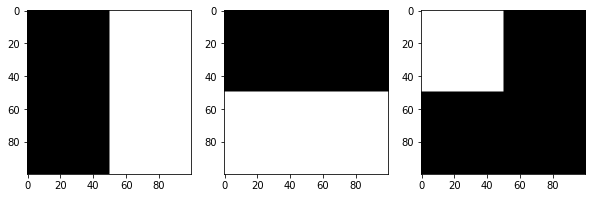

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [ ]:
# Create three 100x100 images with different color channels
image_red = np.zeros((100, 100, 3), dtype=np.uint8)
image_red[:, :, 0] = 255  # Red channel 

image_green = np.zeros((100, 100, 3), dtype=np.uint8)
image_green[:, :, 1] = 255  # Green channel 

image_blue = np.zeros((100, 100, 3), dtype=np.uint8)
image_blue[:, :, 2] = 255  # Blue channel 

# Plot the images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(image_red)
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(image_green)
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(image_blue)
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()




*   Use the above three images to create the following image

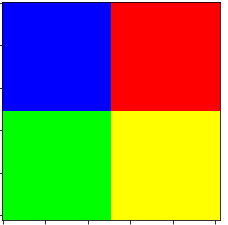
*Hint: Remember channels and color spaces*

In [ ]:
# Create a 100x100 image with four color quadrants
image_combined = np.zeros((100, 100, 3), dtype=np.uint8)

# Top-left (Blue)
image_combined[:50, :50, 2] = 255 
# Top-right (Red)
image_combined[:50, 50:, 0] = 255  
# Bottom-left (Green)
image_combined[50:, :50, 1] = 255  

# Bottom-right (Yellow = Red + Green)
image_combined[50:, 50:, 0] = 255  # Red 
image_combined[50:, 50:, 1] = 255  # Green 

# Display the image
plt.imshow(image_combined)
plt.title("Combined Image")
plt.axis("off")
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

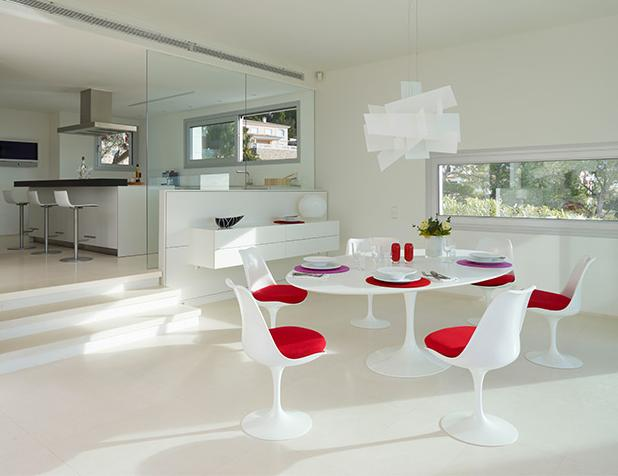

*   Extract individual channels and plot them using matplotlib subplot.



In [ ]:
import cv2

# Read the image 'sillas.jpg'
image = cv2.imread('images/sillas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Extract individual color channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

# Plot the original image and the three channels
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image)
axes[0].set_title("sillas.jpg")
axes[0].axis("off")

axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("sillas.jpg Red Channel")
axes[1].axis("off")

axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("sillas.jpg Green Channel")
axes[2].axis("off")

axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("sillas.jpg Blue Channel")
axes[3].axis("off")

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [ ]:
# Read the image 'sillas.jpg'
image = cv2.imread('images/sillas.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Create a new image where red is changed to blue
modified_image = image.copy()
red_mask = (image[:, :, 0] > 150) & (image[:, :, 1] < 100) & (image[:, :, 2] < 100)  # Used to identify red pixels
modified_image[red_mask, 0] = 0   # Remove red
modified_image[red_mask, 1] = 0   # Remove green
modified_image[red_mask, 2] = 255  # Set blue

# Plot original image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("sillas.jpg")
axes[0].axis("off")

# Plot modified image
axes[1].imshow(modified_image)
axes[1].set_title("sillas.jpg Modified (Red to Blue)")
axes[1].axis("off")

plt.show()




# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

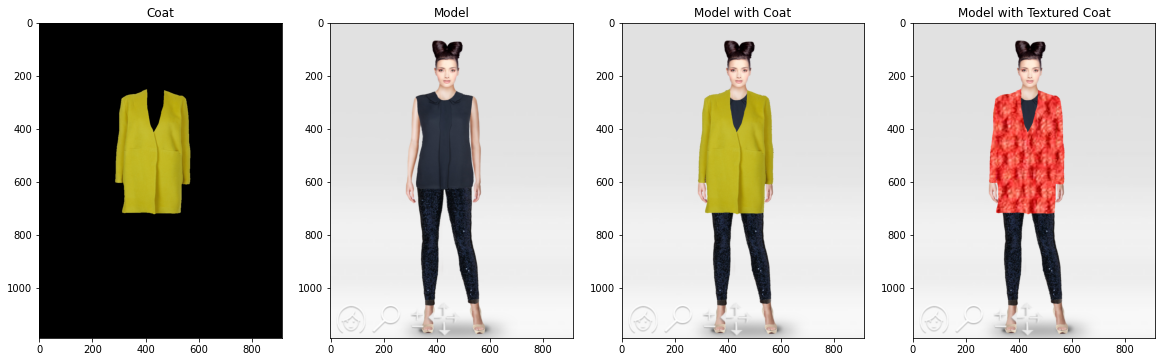

In [ ]:
import cv2

# Read the images
model = cv2.imread('images/model.png')
coat = cv2.imread('images/coat.png')
texture = cv2.imread('images/texture2.png')  # Choose any texture image

# Convert images to RGB
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)

# Create a mask to extract the coat area
coat_gray = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(coat_gray, 1, 255, cv2.THRESH_BINARY)

# Ensure the coat fits onto the model
coat_resized = cv2.resize(coat, (model.shape[1], model.shape[0]))
mask_resized = cv2.resize(mask, (model.shape[1], model.shape[0]))

# Overlay the coat onto the model
model_with_coat = model.copy()
model_with_coat[mask_resized > 0] = coat_resized[mask_resized > 0]

# Apply the texture to the coat area
texture_resized = cv2.resize(texture, (coat_resized.shape[1], coat_resized.shape[0]))
coat_textured = coat_resized.copy()
coat_textured[mask_resized > 0] = texture_resized[mask_resized > 0]

# Overlay the textured coat onto the model
model_with_textured_coat = model.copy()
model_with_textured_coat[mask_resized > 0] = coat_textured[mask_resized > 0]

# Plot the images
#Model
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[1].imshow(model)
axes[1].set_title("Model")
axes[1].axis("off")

# Coat
axes[0].imshow(coat)
axes[0].set_title("Coat")
axes[0].axis("off")

#Model with coat
axes[2].imshow(model_with_coat)
axes[2].set_title("Model with Coat")
axes[2].axis("off")

#Model with textured coat
axes[3].imshow(model_with_textured_coat)
axes[3].set_title("Model with Textured Coat")
axes[3].axis("off")

plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [ ]:
from skimage import data, color, exposure

# Contrast Enhancement - Histogram Computation
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

# Compute histogram
hist, bin_centers = exposure.histogram(astronaut_gray)

# Plot grayscale image and histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title("Astronaut")
axes[0].axis("off")

axes[1].plot(bin_centers, hist, lw=2)
axes[1].set_title("Histogram")
axes[1].set_xlabel("Pixel intensity")
axes[1].set_ylabel("Frequency")

plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.



*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

**1- What happens when you change the bin count?**
*Changing the bin count alters the resolution of the histogram. (A lower bin count makes the histogram coarser, while a higher bin count provides more detail.)*

**2- Does your inference change based on the bin count?**
*Yes, the inference can change. A low bin count might oversimplify the image, while a high bin count captures more detailed differences in intensity*

**3- If yes, then how do you define the correct bin count?**
*The correct bin count depends on the image's complexity and the level of detail needed for analysis.*

**4- What happens when the bin count is very low and what happens when it is very high?**
*- Low bin count: 1-The histogram becomes coarse 2-It lose finer details 3-The image’s variations might be oversimplified*
*- High bin count: 1-The histogram becomes more detailed 2- It will capture subtle variations  3- It may also introduce noise and become complex.*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


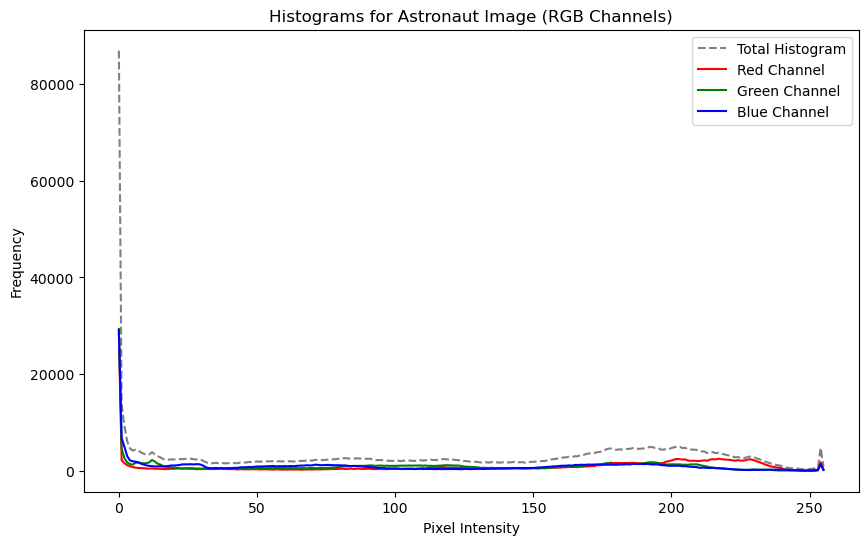

In [124]:
from skimage import data

astronaut = data.astronaut()

# Compute the histogram for each color channel (R, G, B)
hist_r, bins_r = np.histogram(astronaut[:, :, 0], bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(astronaut[:, :, 1], bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(astronaut[:, :, 2], bins=256, range=(0, 256))

# Compute the total histogram (sum of R, G, B histograms)
hist_total = hist_r + hist_g + hist_b

# Plot the histograms
plt.figure(figsize=(10, 6))

# Plot total histogram
plt.plot(bins_r[:-1], hist_total, color='gray', label='Total Histogram', linestyle='--')

# Plot individual channel histograms
plt.plot(bins_r[:-1], hist_r, color='red', label='Red Channel')
plt.plot(bins_r[:-1], hist_g, color='green', label='Green Channel')
plt.plot(bins_r[:-1], hist_b, color='blue', label='Blue Channel')

# Add titles and labels
plt.title('Histograms for Astronaut Image (RGB Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



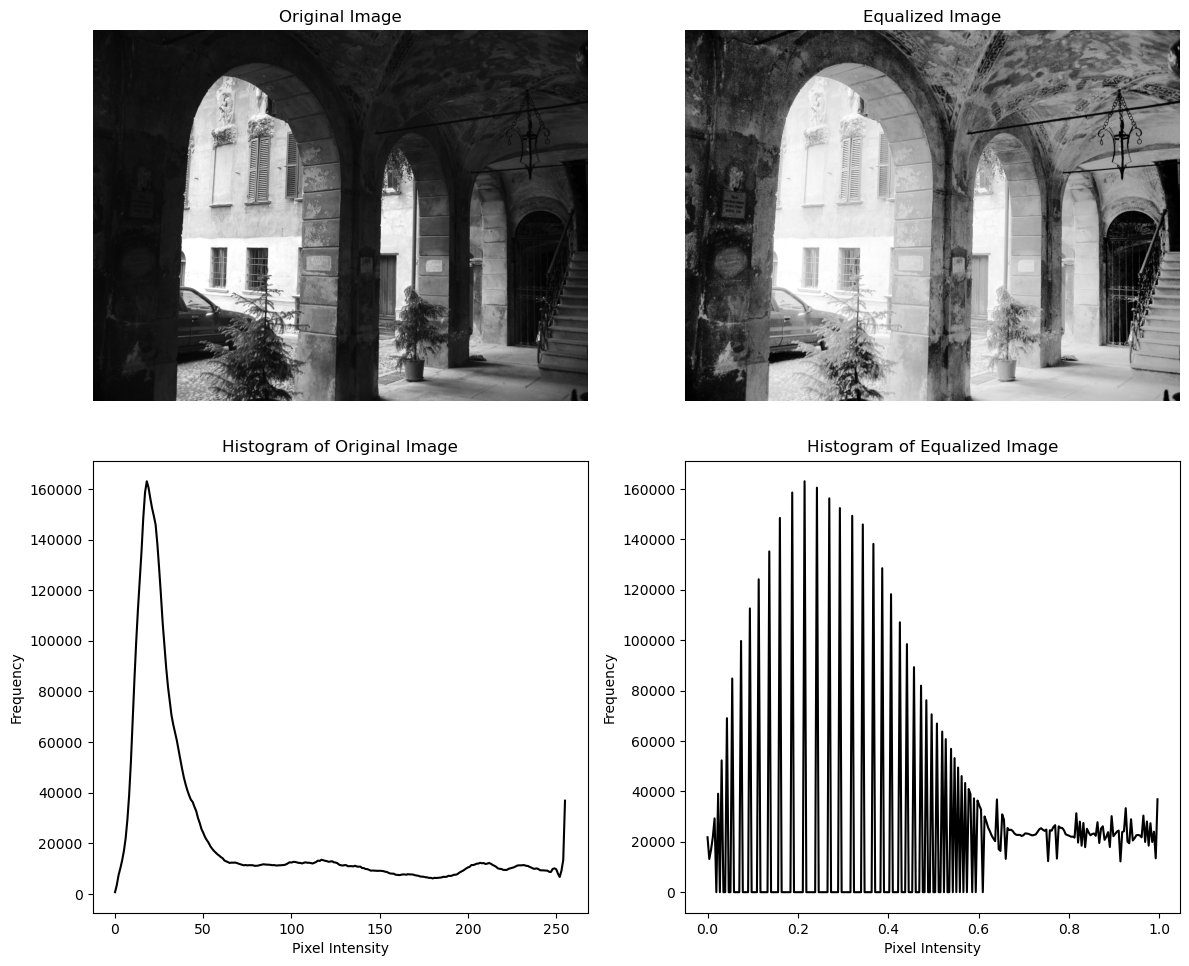

In [136]:
import cv2
from skimage import exposure

# Read the image
img = cv2.imread('images/aquatermi_lowcontrast.jpg')

# Convert the image to grayscale
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute the histogram of the original grayscale image
hist_original, bins_original = np.histogram(image_gray, bins=256, range=(0, 256))

# Perform histogram equalization
image_equalized = exposure.equalize_hist(image_gray)

# Compute the histogram of the equalized image
hist_equalized, bins_equalized = np.histogram(image_equalized, bins=256, range=(0, 1))

# Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Display the original grayscale image
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis('off')

# Display the equalized grayscale image
axes[0, 1].imshow(image_equalized, cmap='gray')
axes[0, 1].set_title("Equalized Image")
axes[0, 1].axis('off')

# Plot the histogram of the original image
axes[1, 0].plot(bins_original[:-1], hist_original, color='black')
axes[1, 0].set_title("Histogram of Original Image")
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

# Plot the histogram of the equalized image
axes[1, 1].plot(bins_equalized[:-1], hist_equalized, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*Key Difference: Histogram equalization adapts to the image’s histogram, while linear contrast stretch applies a global linear transformation.*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



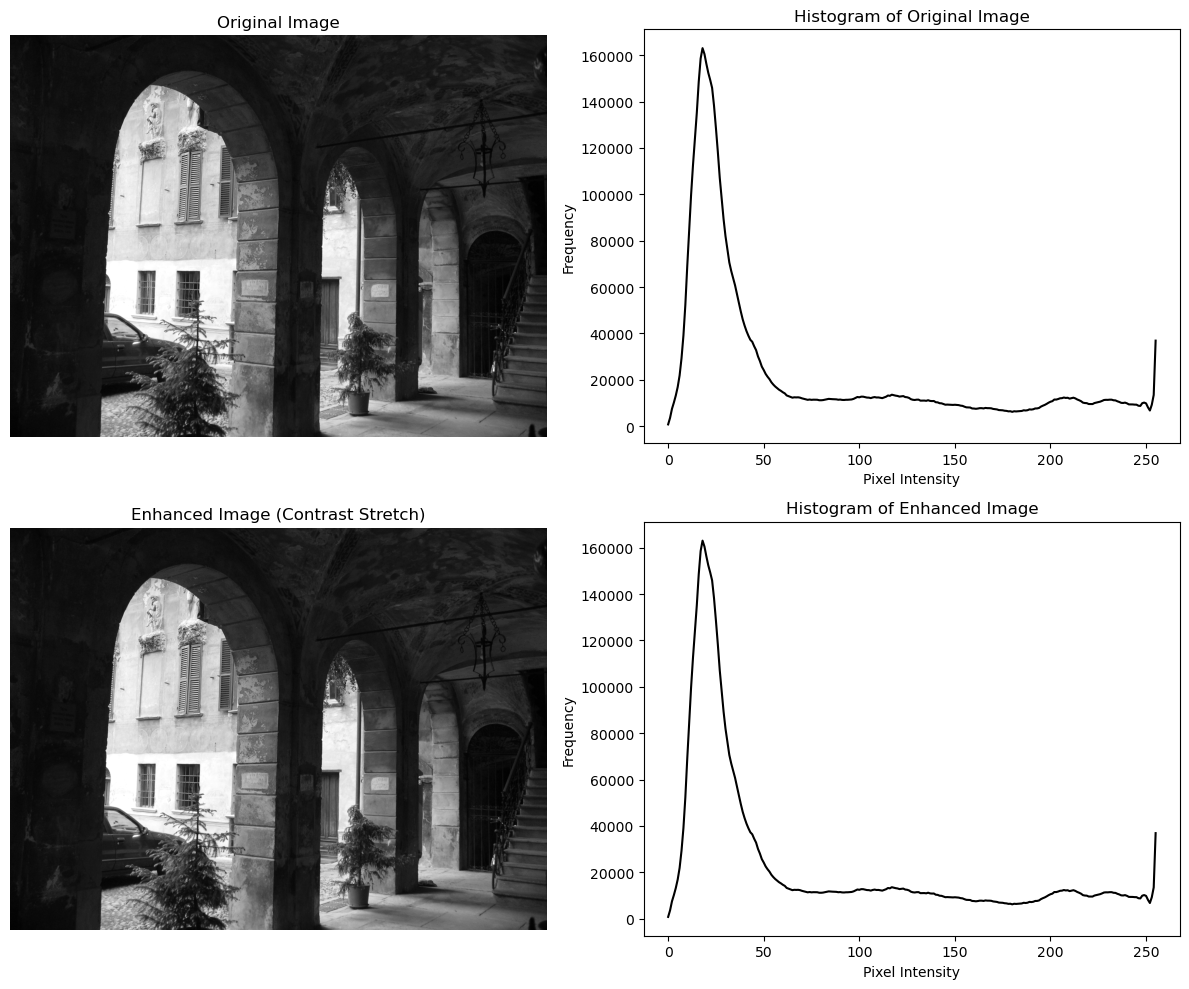

In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Linear Contrast Stretch
def linear_contrast_stretch(image_gray, bins=256):
    # Find the minimum and maximum pixel values
    I_min = np.min(image_gray)
    I_max = np.max(image_gray)
    
    # Apply linear contrast stretch formula
    stretched_image = (image_gray - I_min) / (I_max - I_min) * (bins - 1)
    stretched_image = np.uint8(stretched_image)  # Convert to uint8 for image display

    return stretched_image

# Read the image and convert it to grayscale
img = cv2.imread('images/aquatermi_lowcontrast.jpg')
if img is None:
    print("Error: Image not found or unable to load.")
else:
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Linear Contrast Stretch
    enhanced_image = linear_contrast_stretch(image_gray)

    # Compute the histograms
    hist_original, bins_original = np.histogram(image_gray, bins=256, range=(0, 256))
    hist_enhanced, bins_enhanced = np.histogram(enhanced_image, bins=256, range=(0, 256))

    # Create 2 x 2 subplot for original image, histogram, enhanced image, and enhanced histogram
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Display the original grayscale image
    axes[0, 0].imshow(image_gray, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')

    # Plot the histogram of the original image
    axes[0, 1].plot(bins_original[:-1], hist_original, color='black')
    axes[0, 1].set_title("Histogram of Original Image")
    axes[0, 1].set_xlabel('Pixel Intensity')
    axes[0, 1].set_ylabel('Frequency')

    # Display the enhanced grayscale image
    axes[1, 0].imshow(enhanced_image, cmap='gray')
    axes[1, 0].set_title("Enhanced Image (Contrast Stretch)")
    axes[1, 0].axis('off')

    # Plot the histogram of the enhanced image
    axes[1, 1].plot(bins_enhanced[:-1], hist_enhanced, color='black')
    axes[1, 1].set_title("Histogram of Enhanced Image")
    axes[1, 1].set_xlabel('Pixel Intensity')
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




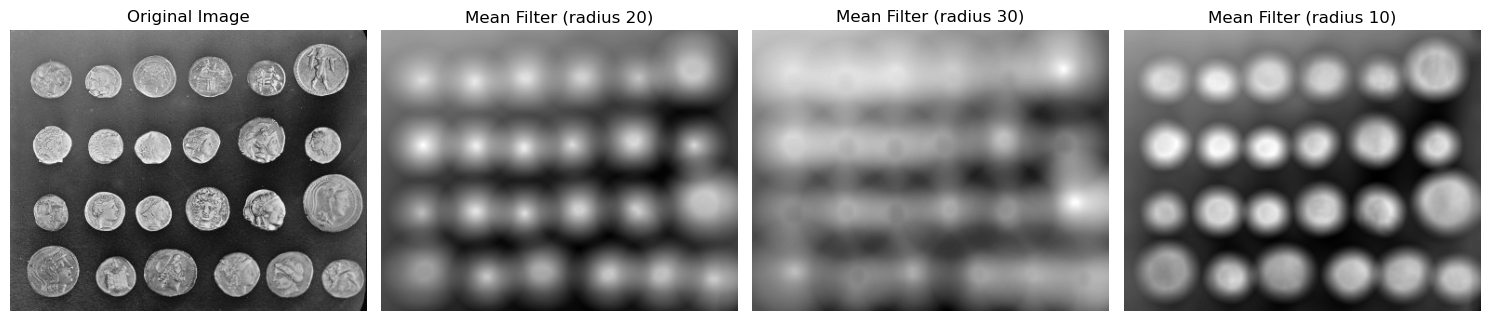

In [152]:
from skimage import data, filters, morphology, img_as_ubyte
from skimage.filters import rank
from skimage.color import rgb2gray

# Load the coins image
coins = data.coins()

# Ensure the image is in the correct format 
coins = img_as_ubyte(coins)

# Define disk structuring elements of various radii
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)  
selem_10 = morphology.disk(10)  

# Apply mean filters
mean_filtered_20 = rank.mean(coins, selem_20)
mean_filtered_30 = rank.mean(coins, selem_30)
mean_filtered_10 = rank.mean(coins, selem_10)

# Plot the original and filtered images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(coins, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(mean_filtered_20, cmap='gray')
axes[1].set_title('Mean Filter (radius 20)')
axes[2].imshow(mean_filtered_30, cmap='gray')
axes[2].set_title('Mean Filter (radius 30)')
axes[3].imshow(mean_filtered_10, cmap='gray')
axes[3].set_title('Mean Filter (radius 10)')

# Remove axes ticks
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()



*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

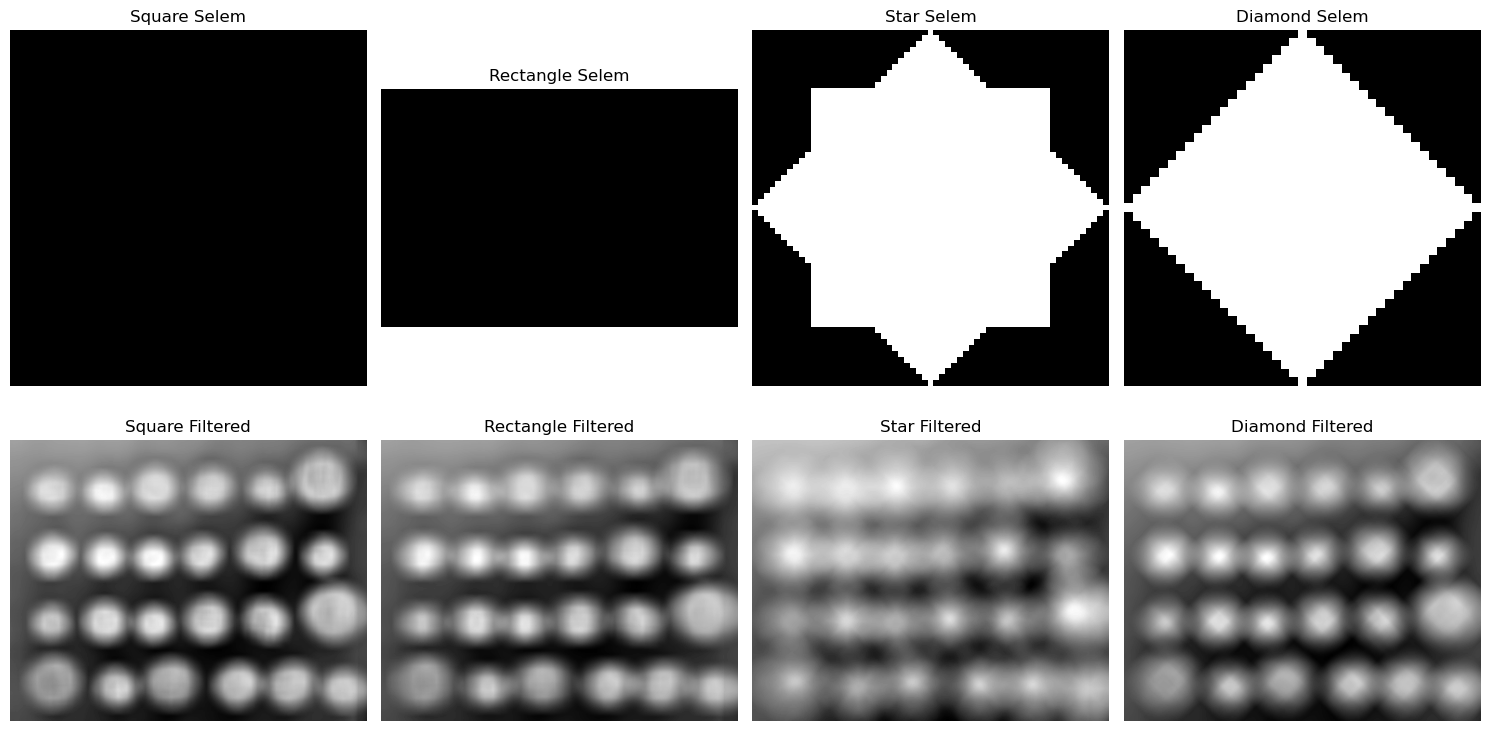

In [154]:
from skimage import data, filters, morphology, img_as_ubyte
from skimage.filters import rank

# Load the coins image
coins = data.coins()
coins = img_as_ubyte(coins)

# Define different structuring elements
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Apply mean filters
mean_square = rank.mean(coins, selem_square)
mean_rectangle = rank.mean(coins, selem_rectangle)
mean_star = rank.mean(coins, selem_star)
mean_diamond = rank.mean(coins, selem_diamond)

# Structuring elements and their corresponding filtered images
selems = [selem_square, selem_rectangle, selem_star, selem_diamond]
filtered_images = [mean_square, mean_rectangle, mean_star, mean_diamond]
titles = ['Square', 'Rectangle', 'Star', 'Diamond']

# Plot the structuring elements and filtered images
fig, axes = plt.subplots(2, len(selems), figsize=(15, 8))

for i, (selem, filtered, title) in enumerate(zip(selems, filtered_images, titles)):
    # Display structuring element
    axes[0, i].imshow(selem, cmap='gray')
    axes[0, i].set_title(f'{title} Selem')
    axes[0, i].axis('off')
    
    # Display filtered image
    axes[1, i].imshow(filtered, cmap='gray')
    axes[1, i].set_title(f'{title} Filtered')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*Increasing the radius of the disk structuring element makes the mean filter consider a larger neighborhood, resulting in stronger smoothing — blurring more details and edges. 

Decreasing the radius reduces the neighborhood size, preserving more details and creating a subtler smoothing effect.*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*Different structuring elements affect smoothing patterns:

-Square and rectangle produce blocky, grid-like smoothing.
-Star creates a more angular, pointy effect.
-Diamond gives a smoother, rounded result.

The shape influences how neighboring pixels are averaged, leading to distinct smoothing behaviors.*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

**1- What is the difference between mean filter and gaussian filter?**
*The mean filter averages pixel values in a neighborhood, giving equal weight to all pixels, leading to uniform blurring.
The Gaussian filter uses a weighted average, giving more importance to closer pixels, resulting in smoother, more natural blurring.*

**2- Where do you use mean filters and where do you use gaussian filters?**
*-Use mean filters for simple noise reduction and fast smoothing.
 -Use Gaussian filters for more advanced, edge-preserving smoothing and realistic blurring.*
...